In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('Admission_predict.csv')

In [27]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
df.drop('Serial No.',axis=1,inplace=True)

In [29]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [31]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Here we know the upper and lower bound so we used the MinMaxScaler.
> This dataset have some types of exam score. So,we know what will be the max score(upper bound) of that exam and min score to pass(lower bound) the exam.

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [34]:
X.shape

(400, 7)

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()

# It is regression Problem so we used linear activation function at the output layer.

In [36]:
model.add(Dense(20,activation='relu',input_dim=7))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

c:\Users\choud\anaconda3\envs\mlenv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381 (1.49 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [40]:
History=model.fit(X_train_Scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8714 - val_loss: 0.7475
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5519 - val_loss: 0.4627
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3317 - val_loss: 0.2708
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1909 - val_loss: 0.1548
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1074 - val_loss: 0.0853
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0599 - val_loss: 0.0481
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0356 - val_loss: 0.0318
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0259 - val_loss: 0.0262
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0227 - val_loss: 0.0241
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - val_loss: 0.0225
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0193 - val_loss: 0.0206
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0174 - val_loss: 0.0188


In [41]:
y_pred=model.predict(X_test_Scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7186361714827891

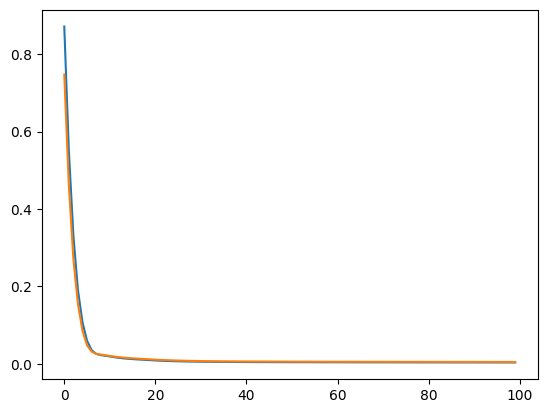

In [44]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])